In [4]:
%matplotlib inline

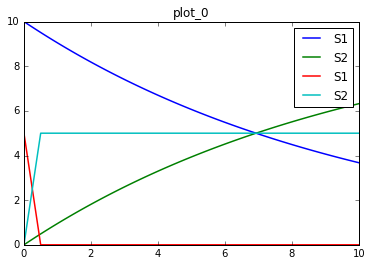

In [5]:
from __future__ import print_function
import tellurium as te
import phrasedml.phrasedml as phrasedml

antimonyStr = """
model test
    J0: S1 -> S2; k1*S1;
    S1 = 10.0; S2=0.0;
    k1 = 0.1;
end
"""
phrasedmlStr = """
    model0 = model "test"
    model1 = model "test" with S1=5.0, k1=0.3
    sim0 = simulate uniform(0, 10, 100)
    sim1 = simulate uniform_stochastic(0, 10, 100)
    task0 = run sim0 on model0
    task1 = run sim1 on model1
    plot task0.time vs task0.S1, task0.S2, task1.S1, task1.S2
"""

r = te.loada(antimonyStr)
sbmlStr = r.getSBML()
phrasedml.setReferencedSBML("test", sbmlStr)
sedml = phrasedml.convertString(phrasedmlStr)

exp = te.experiment(antimonyStr, phrasedmlStr)
exp.execute()

In [6]:
import tellurium as te
r = te.loada("""S1 = 0""")
r.steadyStateSelections = ['S1']
r.steadyState()

RuntimeError: Bad input to size of model parameter

In [ ]:
import matplotlib


In [ ]:
matplotlib.rcParams['axes.color_cycle'] 

In [ ]:
5%3

In [7]:
from __future__ import print_function, division
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import libsedml
import pandas
import os.path

workingDir = '/home/mkoenig/git/tellurium/tellurium/tests/testdata/sedml/sed-ml'

# --------------------------------------------------------
# Models
# --------------------------------------------------------
#  - model1 

# Model <model1>
model1 = te.loadSBMLModel(os.path.join(workingDir, '../models/BorisEJB.xml'))

# --------------------------------------------------------
# Tasks
# --------------------------------------------------------
#  - task1 

# Task <task1>
task1 = [None]
model1.setIntegrator('cvode')
Config = model1
model1.conservedMoietyAnalysis = True
model1.steadyStateSelections = ['[MKKK]', '[MKKK_P]', '[MAPK]', '[MAPK_PP]', '[MKK_P]', '[MAPK_P]', 'time', '[MKK]']
print(model1.selections)
print(model1.steadyStateSelections)
task1[0] = model1.steadyState()
print(task1)
model1.conservedMoietyAnalysis = False